# Census Income Project

## Problem Statement:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)).

The prediction task is to determine whether a person makes over $ 50k a year.

### Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1. A single cell estimate of the population 16+ for each state.

2. Controls for Hispanic Origin by age and sex.

3. Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

### Loading the DataSet

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### EDA

In [3]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

1. The dataset contains 32560 rows and 15 columns including the target coulmn.

2. 'Income' column is the target column.

## Feature Columns:
Age: Age of the civilians.

Workclass: working class of the civilians (Federal-gov, Local-gov, Never-Worked, Private, Self-emp-inc, self-emp-not-inc, state-gov, without-pay)

Fnlwgt: (Final Weight)

Education: education level of the civilians

Education_num : shows the number of years of study completed by the civilians.

Marital_status : shows marital status of the civilians.

Occupation : occupation of the civilians.

Relationship : shows relationship status

Race : shows race of the civilians. ( Asian-Pac-Islander, White, Black, Amer-Indian-Eskimo, other)

Sex : sex of the civilians (Male, Female)

Capital_gain : capital gains

Capital_loss : capital loss

Hours_per_week : average of hours worked per week

Native_country : Country of origin

Target Coulmn:
Income : This is the target column.


In [4]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
nf = df.select_dtypes(include=[np.number]).columns
cf = df.select_dtypes(include=[np.object]).columns

print(nf,"\n",cf)

Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object') 
 Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')


In [10]:
print( df.Income.value_counts())

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


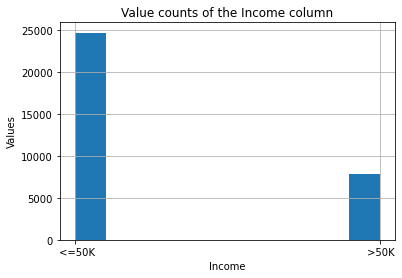

In [11]:
df['Income'].hist(grid=True)
plt.ylabel('Values')
plt.xlabel('Income')
plt.title('Value counts of the Income column')
plt.show()

In [12]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

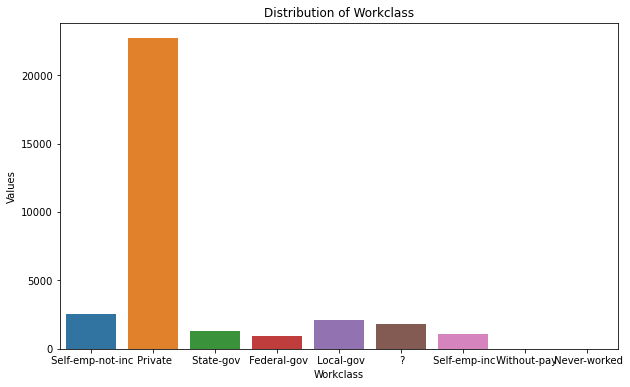

In [13]:
plt.figure(figsize=[10,6])
sns.countplot(x='Workclass', data=df)
plt.ylabel('Values')
plt.xlabel('Workclass')
plt.title('Distribution of Workclass')
plt.show()

In [14]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

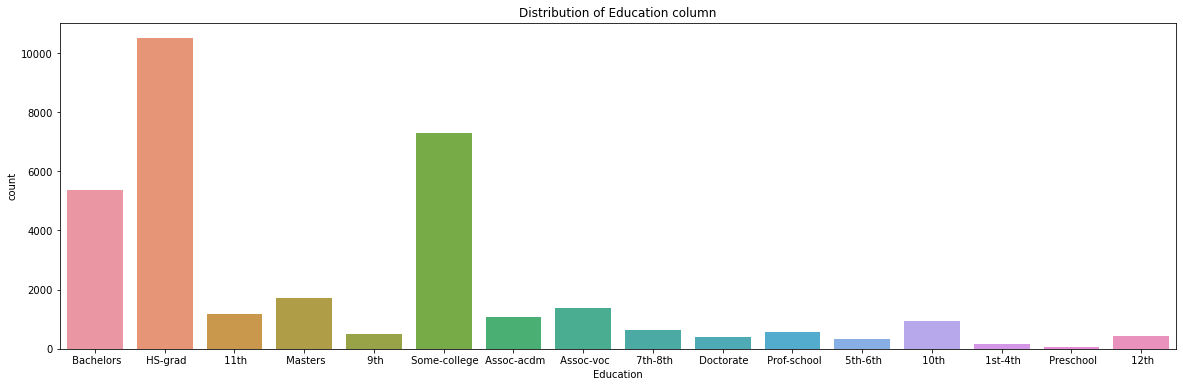

In [15]:
plt.figure(figsize=[20,6])
sns.countplot(x='Education', data=df)
plt.title('Distribution of Education column')
plt.show()

In [16]:
df['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

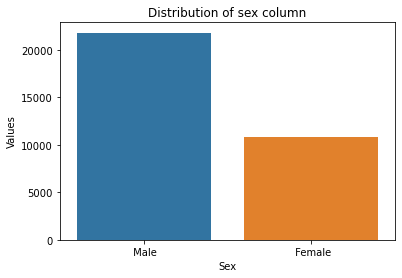

In [17]:
plt.figure(figsize=[6,4])
sns.countplot(x='Sex', data=df)
plt.ylabel('Values')
plt.xlabel('Sex')
plt.title('Distribution of sex column')
plt.show()

In [18]:
df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

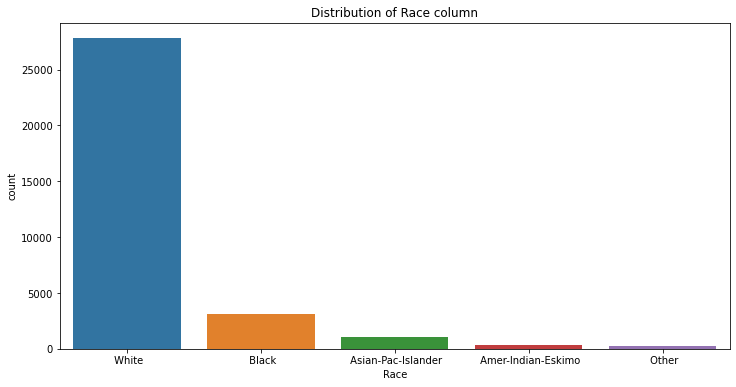

In [19]:
plt.figure(figsize=[12,6])
sns.countplot(x='Race', data=df)
plt.title('Distribution of Race column')
plt.show()

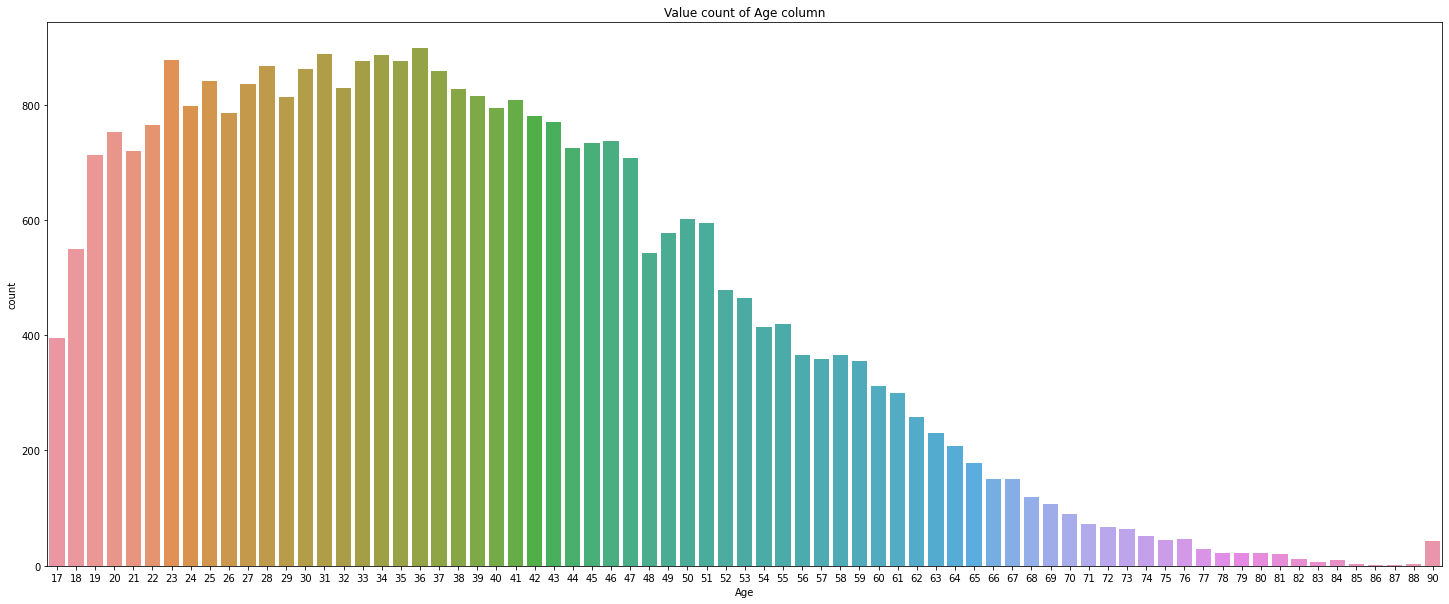

In [20]:
plt.figure(figsize=[25,10])
sns.countplot(x='Age', data=df)
plt.title('Value count of Age column')
plt.show()

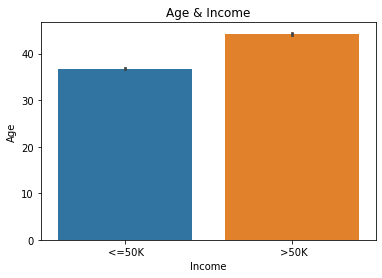

In [21]:
plt.figure(figsize=[6,4])
sns.barplot(x='Income', y='Age', data = df)
plt.xlabel('Income')
plt.ylabel('Age')
plt.title('Age & Income')
plt.show()

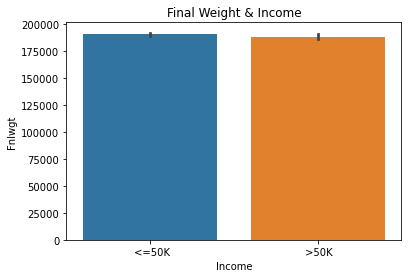

In [22]:
plt.figure(figsize=[6,4])
sns.barplot(x='Income', y='Fnlwgt', data = df)
plt.xlabel('Income')
plt.ylabel('Fnlwgt')
plt.title('Final Weight & Income')
plt.show()

In [23]:
df['Workclass'] = LabelEncoder().fit_transform(df['Workclass'])
df['Education'] = LabelEncoder().fit_transform(df['Education'])
df['Marital_status'] = LabelEncoder().fit_transform(df['Marital_status'])
df['Occupation'] = LabelEncoder().fit_transform(df['Occupation'])
df['Relationship'] = LabelEncoder().fit_transform(df['Relationship'])
df['Race'] = LabelEncoder().fit_transform(df['Race'])
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Native_country'] = LabelEncoder().fit_transform(df['Native_country'])
df['Income'] = LabelEncoder().fit_transform(df['Income'])

In [24]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


In [25]:
df.dtypes

Age               int64
Workclass         int64
Fnlwgt            int64
Education         int64
Education_num     int64
Marital_status    int64
Occupation        int64
Relationship      int64
Race              int64
Sex               int64
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int64
Income            int64
dtype: object

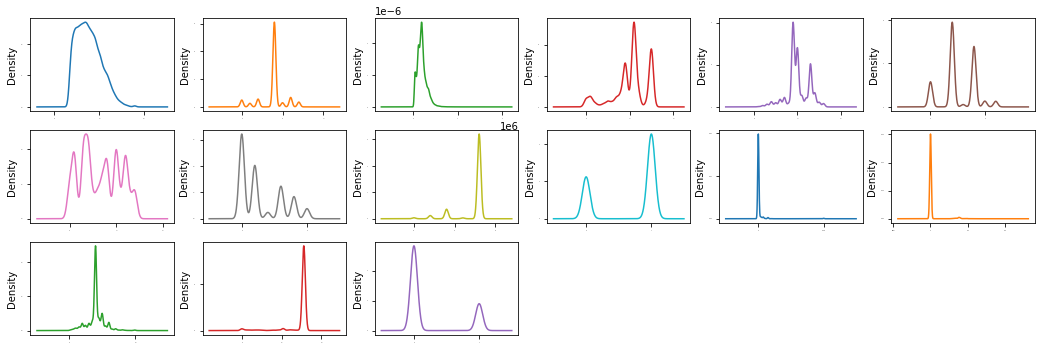

In [26]:
df.plot(kind='density', subplots=True, layout=(6,6), sharex=False, legend=False, fontsize=1, figsize=[18,12])
plt.show()

In [27]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


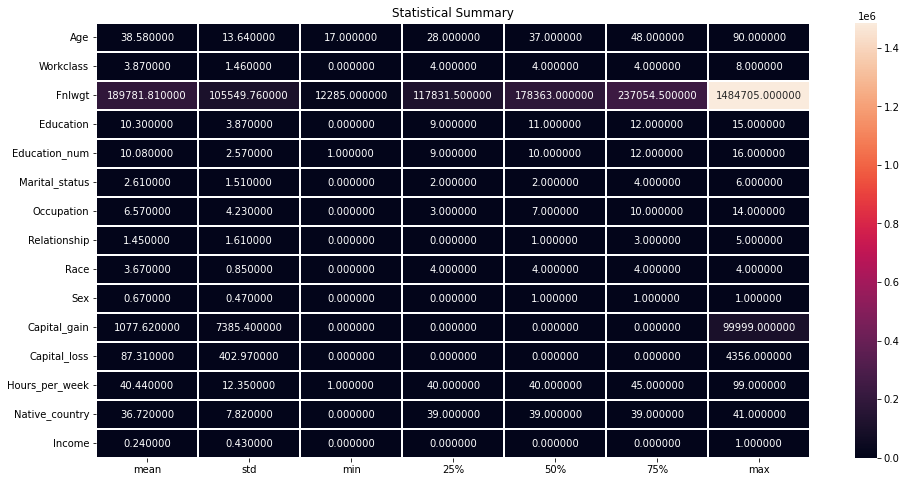

In [28]:
plt.figure(figsize=[16,8])
sns.heatmap(round(df.describe()[1:].transpose(),2), annot=True, linewidths=0.25, linecolor='white', fmt='f')
plt.title('Statistical Summary')
plt.show()

In [29]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


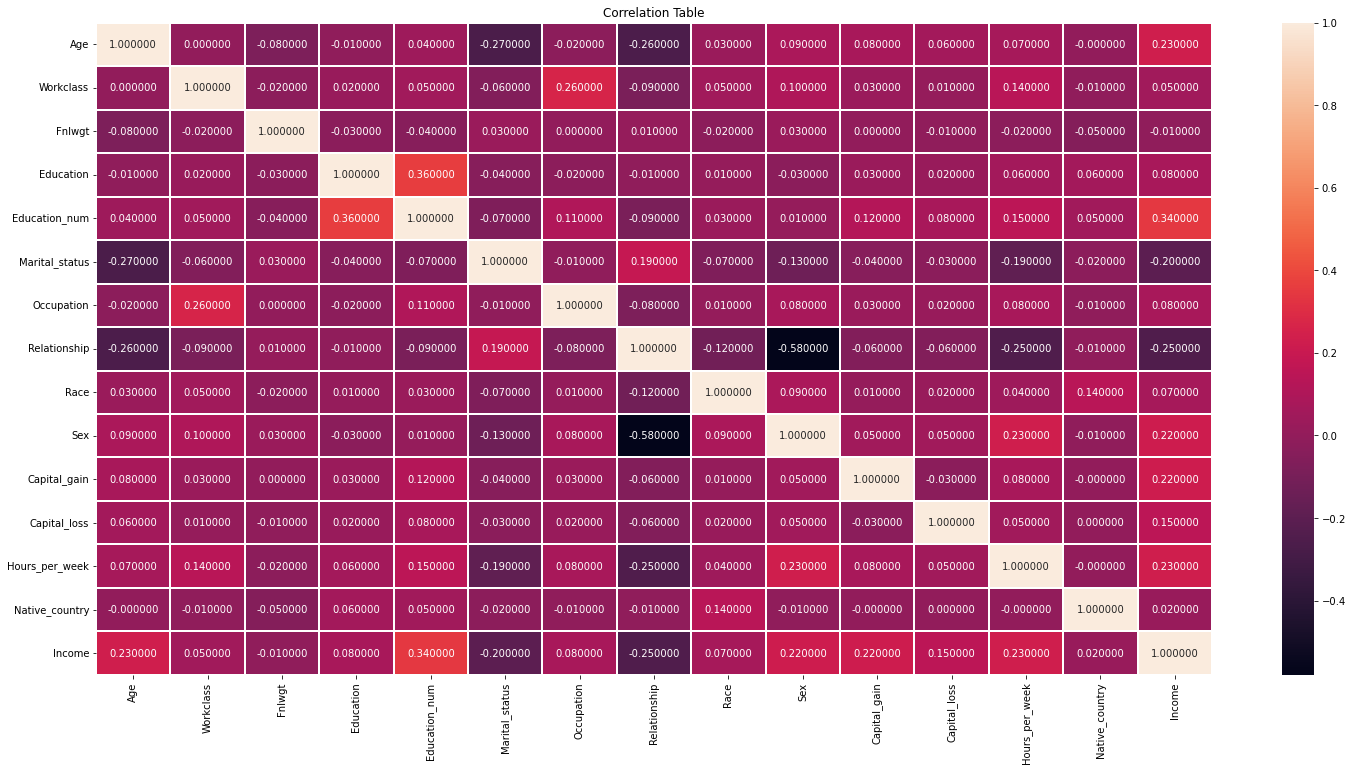

In [30]:
plt.figure(figsize=[25,12])
sns.heatmap(round(df.corr().transpose(),2), annot=True, linewidths=0.45, linecolor='white', fmt='f')
plt.title('Correlation Table')
plt.show()

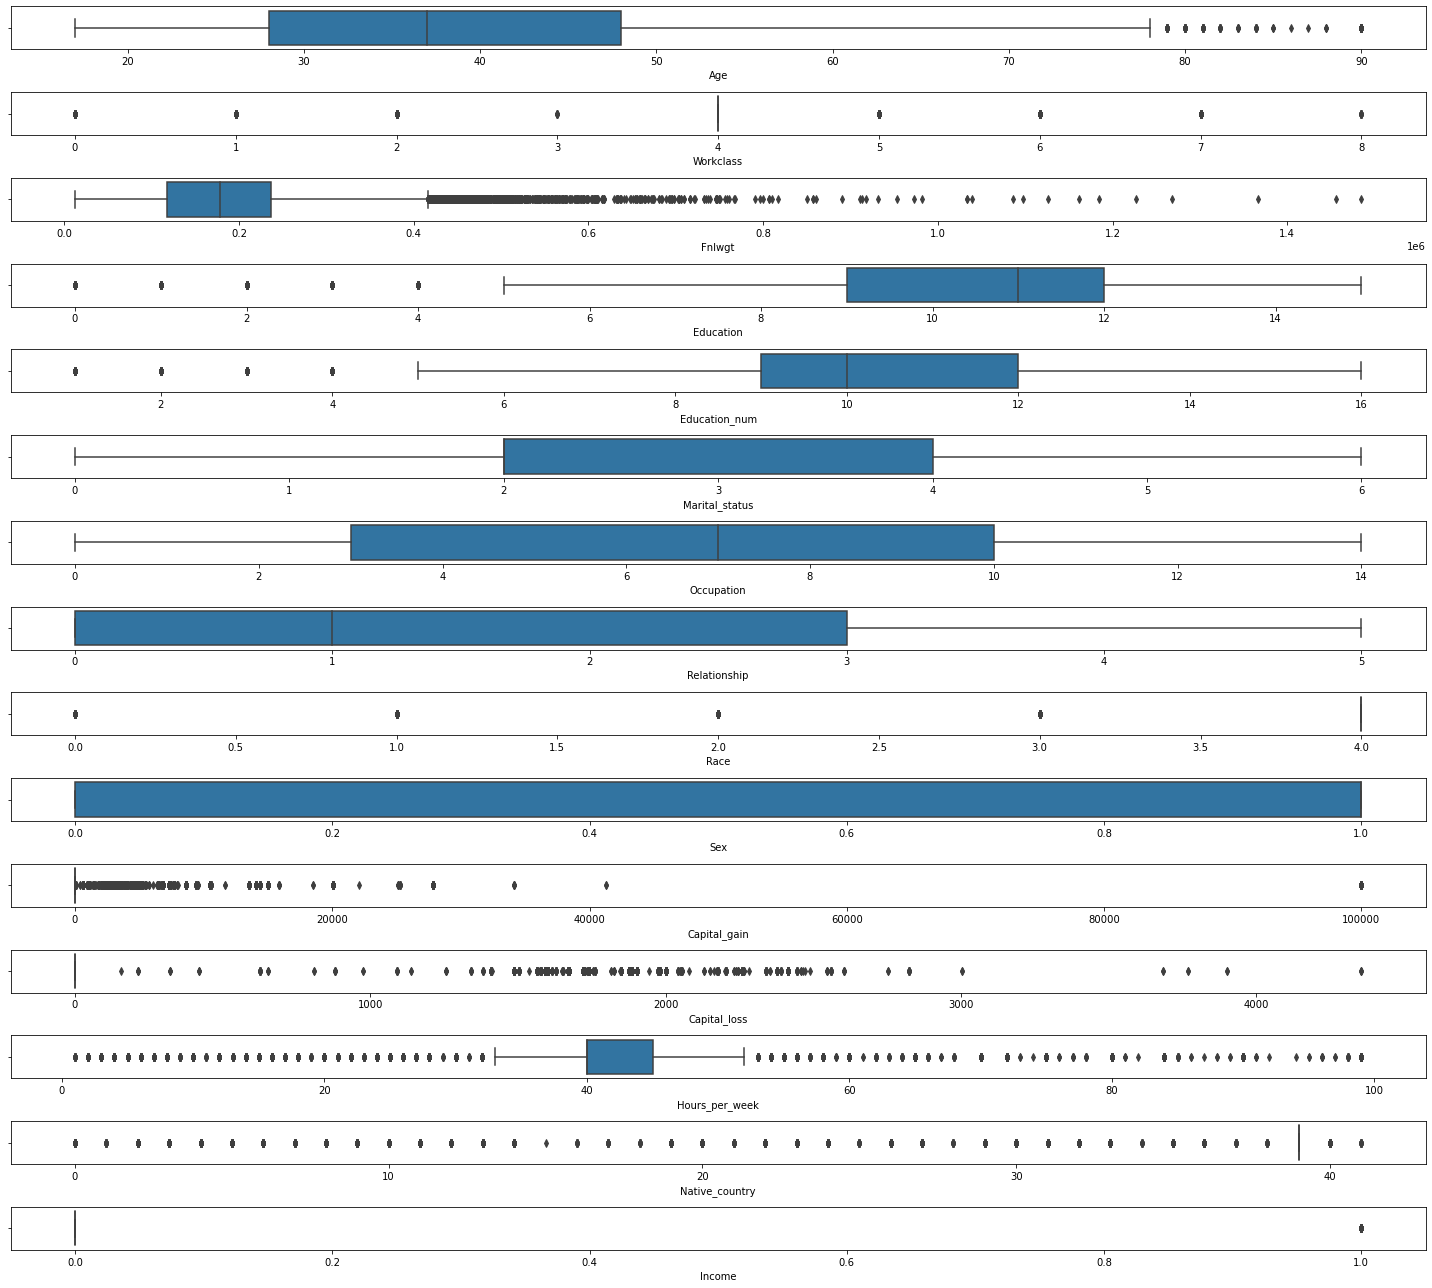

In [31]:
fig, axs = plt.subplots(15, figsize = (20,18))
plt1 = sns.boxplot(df['Age'], ax = axs[0])
plt2 = sns.boxplot(df['Workclass'], ax = axs[1])
plt3 = sns.boxplot(df['Fnlwgt'], ax = axs[2])
plt4 = sns.boxplot(df['Education'], ax = axs[3])
plt5 = sns.boxplot(df['Education_num'], ax = axs[4])
plt6 = sns.boxplot(df['Marital_status'], ax = axs[5])
plt7 = sns.boxplot(df['Occupation'], ax = axs[6])
plt8 = sns.boxplot(df['Relationship'], ax = axs[7])
plt9 = sns.boxplot(df['Race'], ax = axs[8])
plt10 = sns.boxplot(df['Sex'], ax = axs[9])
plt11 = sns.boxplot(df['Capital_gain'], ax = axs[10])
plt12 = sns.boxplot(df['Capital_loss'], ax = axs[11])
plt13 = sns.boxplot(df['Hours_per_week'], ax = axs[12])
plt14 = sns.boxplot(df['Native_country'], ax = axs[13])
plt15 = sns.boxplot(df['Income'], ax = axs[14])

plt.tight_layout()

### Outcomes of the Boxplot

The above boxplot shows that outliers are present in the following columns:

Age

Workclass

Fnlwgt

Education

Education_num

Race

Capital_gain

Capital_loss

Hours_per_week

Native_country

In [61]:
df.skew()


Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

### Outcomes of the skewness:

The thershold for the skewness is taken as +0.5 to -0.5. The value outside this is considered as skewed.

The skewed feature columns are:

Age

Workclass

Fnlwgt

Education

Relationship

Race

Sex


Capital_gain

Capital_loss

Natice_country

Coulmns without skewness are:



Education_num

Marital_status

Occupation

Hours_per_week



In [33]:
from scipy.stats import zscore

z = np.abs(zscore(df))
z.shape

(32560, 15)

In [34]:
thershold = 3
print (np.where(z>3))

(array([    3,     9,    10, ..., 32532, 32550, 32552]), array([13, 12,  8, ...,  8,  8,  8]))


In [35]:
df_new = df[(z<3).all(axis=1)]
print('The shape of original dataset is ',df.shape)
print('The shape of dataset after removing the outliers is ',df_new.shape)

The shape of original dataset is  (32560, 15)
The shape of dataset after removing the outliers is  (27417, 15)


In [36]:
loss_per = ((32560-27417)/32560)*100
print('The percentage of data lost is ', loss_per)

The percentage of data lost is  15.795454545454547


In [37]:
x = df_new.drop("Income", axis=1)
y = df_new["Income"]

In [38]:
from sklearn.preprocessing import power_transform
x = power_transform(x)

x

array([[ 0.92387928,  1.65209239, -1.12465326, ..., -0.04054646,
        -2.21338681,  0.17213488],
       [ 0.12850238,  0.01669779,  0.41302315, ..., -0.04054646,
        -0.03813668,  0.17213488],
       [ 1.09846907,  0.01669779,  0.59312735, ..., -0.04054646,
        -0.03813668,  0.17213488],
       ...,
       [ 1.37259752,  0.01669779, -0.24852704, ..., -0.04054646,
        -0.03813668,  0.17213488],
       [-1.32725084,  0.01669779,  0.27467596, ..., -0.04054646,
        -1.71987004,  0.17213488],
       [ 1.04117247,  0.80120487,  1.06334322, ..., -0.04054646,
        -0.03813668,  0.17213488]])

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 0.92387928,  1.65209239, -1.12465326, ..., -0.04054646,
        -2.21338681,  0.17213488],
       [ 0.12850238,  0.01669779,  0.41302315, ..., -0.04054646,
        -0.03813668,  0.17213488],
       [ 1.09846907,  0.01669779,  0.59312735, ..., -0.04054646,
        -0.03813668,  0.17213488],
       ...,
       [ 1.37259752,  0.01669779, -0.24852704, ..., -0.04054646,
        -0.03813668,  0.17213488],
       [-1.32725084,  0.01669779,  0.27467596, ..., -0.04054646,
        -1.71987004,  0.17213488],
       [ 1.04117247,  0.80120487,  1.06334322, ..., -0.04054646,
        -0.03813668,  0.17213488]])

In [40]:
from imblearn.over_sampling import SMOTE
Sm = SMOTE()
x_over, y_over = Sm.fit_resample(x,y)

In [41]:
y_over.value_counts()

0    21279
1    21279
Name: Income, dtype: int64

In [43]:
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0

for i in range (0,600):
    x_train, x_test, y_train, y_test = train_test_split(x_over,y_over,test_size=0.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predlr = LR.predict(x_test)
    acc = accuracy_score(y_test, predlr)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
        
print( maxAccu,maxRS)

0.7855576441102757 20


In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.30, random_state=20)

In [45]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.7855576441102757
[[4814 1491]
 [1247 5216]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.78      6305
           1       0.78      0.81      0.79      6463

    accuracy                           0.79     12768
   macro avg       0.79      0.79      0.79     12768
weighted avg       0.79      0.79      0.79     12768



In [46]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train, y_train)
predRF = RF.predict(x_test)
print(accuracy_score(y_test, predRF))
print(confusion_matrix(y_test, predRF))
print(classification_report(y_test, predRF))

0.8958333333333334
[[5611  694]
 [ 636 5827]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      6305
           1       0.89      0.90      0.90      6463

    accuracy                           0.90     12768
   macro avg       0.90      0.90      0.90     12768
weighted avg       0.90      0.90      0.90     12768



In [47]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test, preddt))

0.8461779448621554
[[5380  925]
 [1039 5424]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      6305
           1       0.85      0.84      0.85      6463

    accuracy                           0.85     12768
   macro avg       0.85      0.85      0.85     12768
weighted avg       0.85      0.85      0.85     12768



In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.8555764411027569
[[4919 1386]
 [ 458 6005]]
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      6305
           1       0.81      0.93      0.87      6463

    accuracy                           0.86     12768
   macro avg       0.86      0.85      0.85     12768
weighted avg       0.86      0.86      0.85     12768



In [49]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(lr,x,y,cv=5)
print('Cross validation score for LogisticRegression is ',scr.mean())

Cross validation score for LogisticRegression is  0.8285736178384671


In [50]:
scr = cross_val_score(RF,x,y,cv=5)
print('Cross validation score for RandomForest is', scr.mean())

Cross validation score for RandomForest is 0.8516616109231199


In [51]:
scr = cross_val_score(dt,x,y,cv=5)
print('Cross validation score for DecisionTree is ', scr.mean())

Cross validation score for DecisionTree is  0.8074917459216492


In [52]:
scr = cross_val_score(knn,x,y,cv=5)
print('Cross validation score for K-Nearest Neighbors is', scr.mean())

Cross validation score for K-Nearest Neighbors is 0.8236497985351713


In [53]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance']}

GCV=GridSearchCV(knn,param_grid, verbose = 1, cv=3, n_jobs = -1)

In [54]:
GCV.fit(x_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [55]:
GCV.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

In [56]:
GCV.best_estimator_

KNeighborsClassifier(weights='distance')

In [57]:
model = GCV.predict(x_test)

print(classification_report(y_test, model))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86      6305
           1       0.82      0.95      0.88      6463

    accuracy                           0.87     12768
   macro avg       0.88      0.87      0.87     12768
weighted avg       0.88      0.87      0.87     12768



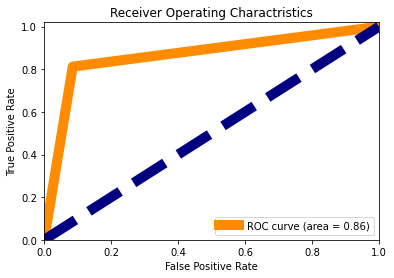

In [58]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(predknn, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr, color ='darkorange', lw=10, label ='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=10, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Charactristics')
plt.legend(loc='lower right')

plt.show()

In [59]:
import pickle
filename = 'census_income.pkl'
pickle.dump(knn, open(filename, 'wb'))

In [60]:
a = np.array(y_test)
predicted = np.array(knn.predict(x_test))
df_conclusion = pd.DataFrame({"Original":a, "Predicted":predicted}, index=range(len(a)))

df_conclusion

,Original,Predicted
0,0,1
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
12763,0,1
12764,0,0
12765,0,0
12766,0,0
